In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
len(data) #very long data

541909

In [4]:
print(len(data["Country"].unique()))
data["Country"].unique()
# 38 different countries

38


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [5]:
grouped_data = data.groupby("Country")
(grouped_data.count().iloc[:,0])
# Countries with maximum entries are Greece, France, United Kingdom

Country
Australia                 1259
Austria                    401
Bahrain                     19
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      8196
European Community          61
Finland                    695
France                    8557
Germany                   9495
Greece                     146
Hong Kong                  288
Iceland                    182
Israel                     297
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1519
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2533


In [6]:
# Checking for NaN values
data.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
EIRE_data = data[data["Country"] == "EIRE"]
Greece_Data = data[data["Country"] == "Greece"]
France_data = data[data["Country"] == "France"]

In [9]:
EIRE_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE


In [10]:
Greece_Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
69007,541932,22699,ROSES REGENCY TEACUP AND SAUCER,24,2011-01-24 11:39:00,2.55,14439.0,Greece
69008,541932,22697,GREEN REGENCY TEACUP AND SAUCER,24,2011-01-24 11:39:00,2.55,14439.0,Greece
69009,541932,22957,SET 3 PAPER VINTAGE CHICK PAPER EGG,24,2011-01-24 11:39:00,2.95,14439.0,Greece
69010,541932,22720,SET OF 3 CAKE TINS PANTRY DESIGN,24,2011-01-24 11:39:00,4.25,14439.0,Greece
69011,541932,72760B,VINTAGE CREAM 3 BASKET CAKE STAND,16,2011-01-24 11:39:00,8.49,14439.0,Greece


In [11]:
France_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France


In [12]:
combined_data = pd.concat([EIRE_data,Greece_Data,France_data])
combined_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
one_hot_encoded = pd.get_dummies(combined_data, columns = ["Country"])
one_hot_encoded.head() #Used one hot encoding to create columns of different countries...

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_EIRE,Country_France,Country_Greece
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,1,0,0
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,1,0,0
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,1,0,0
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,1,0,0
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,1,0,0


In [14]:
data = one_hot_encoded
data['InvoiceDate'].unique()

array(['2010-12-01T14:05:00.000000000', '2010-12-02T16:33:00.000000000',
       '2010-12-02T17:08:00.000000000', '2010-12-03T11:42:00.000000000',
       '2010-12-03T11:48:00.000000000', '2010-12-03T14:04:00.000000000',
       '2010-12-06T12:40:00.000000000', '2010-12-06T13:06:00.000000000',
       '2010-12-06T13:32:00.000000000', '2010-12-09T12:17:00.000000000',
       '2010-12-10T12:33:00.000000000', '2010-12-16T12:56:00.000000000',
       '2010-12-16T19:16:00.000000000', '2010-12-17T10:46:00.000000000',
       '2010-12-17T14:21:00.000000000', '2010-12-19T14:24:00.000000000',
       '2010-12-20T12:25:00.000000000', '2010-12-20T14:05:00.000000000',
       '2010-12-21T13:45:00.000000000', '2010-12-23T11:48:00.000000000',
       '2010-12-23T14:58:00.000000000', '2011-01-05T12:02:00.000000000',
       '2011-01-09T16:07:00.000000000', '2011-01-10T10:07:00.000000000',
       '2011-01-14T14:11:00.000000000', '2011-01-18T10:22:00.000000000',
       '2011-01-20T12:34:00.000000000', '2011-01-24

In [15]:
data = data.drop(["StockCode", "InvoiceNo", "Description"], axis = 1)
data.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_EIRE,Country_France,Country_Greece
1404,4,2010-12-01 14:05:00,9.95,14911.0,1,0,0
1405,6,2010-12-01 14:05:00,2.95,14911.0,1,0,0
1406,6,2010-12-01 14:05:00,2.55,14911.0,1,0,0
1407,50,2010-12-01 14:05:00,0.85,14911.0,1,0,0
1408,6,2010-12-01 14:05:00,2.25,14911.0,1,0,0


In [16]:
#Splitting date into three columns for easiness...
date_data = data["InvoiceDate"]
data["Year"] = date_data.dt.year
data["Month"] = date_data.dt.month
data["Day"] = date_data.dt.day
data = data.drop(["InvoiceDate"], axis = 1)
data.head()

,Quantity,UnitPrice,CustomerID,Country_EIRE,Country_France,Country_Greece,Year,Month,Day
1404,4,9.95,14911.0,1,0,0,2010,12,1
1405,6,2.95,14911.0,1,0,0,2010,12,1
1406,6,2.55,14911.0,1,0,0,2010,12,1
1407,50,0.85,14911.0,1,0,0,2010,12,1
1408,6,2.25,14911.0,1,0,0,2010,12,1


In [17]:
data.isnull().sum() # Still 777 IDs are not available....

Quantity            0
UnitPrice           0
CustomerID        777
Country_EIRE        0
Country_France      0
Country_Greece      0
Year                0
Month               0
Day                 0
dtype: int64

In [18]:
print("Missing values are", 777*100/len(data), "%")
data.dropna(inplace=True)
print("Hence dropping those entries")

Missing values are 4.597905201491212 %
Hence dropping those entries


In [19]:
x = data.iloc[:, 1:]
y = data.iloc[:,0]
x.head()

,UnitPrice,CustomerID,Country_EIRE,Country_France,Country_Greece,Year,Month,Day
1404,9.95,14911.0,1,0,0,2010,12,1
1405,2.95,14911.0,1,0,0,2010,12,1
1406,2.55,14911.0,1,0,0,2010,12,1
1407,0.85,14911.0,1,0,0,2010,12,1
1408,2.25,14911.0,1,0,0,2010,12,1


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

# Decision Tree Model

In [21]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [22]:
y_predicted = tree.predict(x_test)

In [23]:
# calculating rmse for decision tree model
rmse = (sum((y_predicted - y_test)**2))/len(y_test)
rmse

927.3969461123437

# Random Forest Regressor

In [24]:
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [25]:
y_predicted2 = random_forest.predict(x_test)

In [26]:
# calculating rmse for random forest model
rmse_random_forest = (sum((y_predicted2 - y_test)**2))/len(y_test)
rmse_random_forest

601.7490115233669

# Support Vector Model

In [27]:
svr_model = SVR()
svr_model.fit(x_train, y_train)

SVR()

In [28]:
y_predicted3 = svr_model.predict(x_test)

In [29]:
# calculating rmse for SVR model
rmse_SVR = (sum((y_predicted3 - y_test)**2))/len(y_test)
rmse_SVR

941.1552794654605

# Neural Network Architecture

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [31]:
#Creating neural network architecture with 3 hidden layers and relu activation function....
network = Sequential([tf.keras.Input(shape=x_train.shape[1]),
                    Dense(units=350, kernel_initializer='normal', activation='relu', name = 'layer1'),
                    Dense(units=256, kernel_initializer='normal', activation='relu', name = 'layer2'),
                    Dense(units=125, kernel_initializer='normal', activation='relu', name = 'layer3'),
                    Dense(units=1, kernel_initializer='normal', activation = 'linear', name = 'output_layer')])
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 350)               3150      
                                                                 
 layer2 (Dense)              (None, 256)               89856     
                                                                 
 layer3 (Dense)              (None, 125)               32125     
                                                                 
 output_layer (Dense)        (None, 1)                 126       
                                                                 
Total params: 125,257
Trainable params: 125,257
Non-trainable params: 0
_________________________________________________________________


In [32]:
network.compile(optimizer=Adam(0.001), loss=tf.keras.losses.MeanSquaredError())
network.fit(x_train, y_train, epochs = 25, batch_size = 60)

Epoch 1/25
181/181 [==============================] - 2s 4ms/step - loss: 1413.9740
Epoch 2/25
181/181 [==============================] - 1s 5ms/step - loss: 1180.9503
Epoch 3/25
181/181 [==============================] - 1s 4ms/step - loss: 1213.4432
Epoch 4/25
181/181 [==============================] - 1s 4ms/step - loss: 1163.5698
Epoch 5/25
181/181 [==============================] - 1s 5ms/step - loss: 1151.3949
Epoch 6/25
181/181 [==============================] - 1s 4ms/step - loss: 1154.6776
Epoch 7/25
181/181 [==============================] - 1s 4ms/step - loss: 1162.7905
Epoch 8/25
181/181 [==============================] - 1s 4ms/step - loss: 1171.1848
Epoch 9/25
181/181 [==============================] - 1s 4ms/step - loss: 1155.0289
Epoch 10/25
181/181 [==============================] - 1s 4ms/step - loss: 1152.6033
Epoch 11/25
181/181 [==============================] - 1s 4ms/step - loss: 1161.8242
Epoch 12/25
181/181 [==============================] - 1s 4ms/step - loss:

In [33]:
y_predicted4 = network.predict(x_test)

167/167 [==============================] - 0s 2ms/step


In [34]:
y_predicted4 = ((np.array([y_predicted4])).reshape(1,-1))[0]
y_predicted4

array([11.183155, 12.697028, 11.245215, ..., 12.944746, 12.762509,
       10.63125 ], dtype=float32)

In [35]:
# calculating rmse for neural network architecture
rmse_neural_network = (sum((y_predicted4 - y_test)**2))/len(y_test)
rmse_neural_network

918.4006631173261

# Another Neural Network 

In [36]:
#Creating neural network architecture with 2 hidden layers and relu activation function....
network2 = Sequential([tf.keras.Input(shape=x_train.shape[1]),
                    Dense(units=350, kernel_initializer='normal', activation='relu', name = 'layer1'),
                    Dense(units=256, kernel_initializer='normal', activation='relu', name = 'layer2'),
                    Dense(units=1, kernel_initializer='normal', activation = 'linear', name = 'output_layer')])
network2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 350)               3150      
                                                                 
 layer2 (Dense)              (None, 256)               89856     
                                                                 
 output_layer (Dense)        (None, 1)                 257       
                                                                 
Total params: 93,263
Trainable params: 93,263
Non-trainable params: 0
_________________________________________________________________


In [37]:
network2.compile(optimizer=Adam(0.001), loss=tf.keras.losses.MeanSquaredError())
network2.fit(x_train, y_train, epochs = 25, batch_size = 60)

Epoch 1/25
181/181 [==============================] - 2s 4ms/step - loss: 6045.3350
Epoch 2/25
181/181 [==============================] - 1s 4ms/step - loss: 1244.9028
Epoch 3/25
181/181 [==============================] - 1s 4ms/step - loss: 1231.5492
Epoch 4/25
181/181 [==============================] - 1s 4ms/step - loss: 1242.7705
Epoch 5/25
181/181 [==============================] - 1s 3ms/step - loss: 1328.5122
Epoch 6/25
181/181 [==============================] - 1s 4ms/step - loss: 1317.2823
Epoch 7/25
181/181 [==============================] - 1s 4ms/step - loss: 1221.1667
Epoch 8/25
181/181 [==============================] - 1s 4ms/step - loss: 1285.4547
Epoch 9/25
181/181 [==============================] - 1s 4ms/step - loss: 1379.0278
Epoch 10/25
181/181 [==============================] - 1s 4ms/step - loss: 1301.7415
Epoch 11/25
181/181 [==============================] - 1s 4ms/step - loss: 2738.7625
Epoch 12/25
181/181 [==============================] - 1s 4ms/step - loss:

In [38]:
y_predicted5 = network2.predict(x_test)
y_predicted5 = ((np.array([y_predicted5])).reshape(1,-1))[0]
y_predicted5

167/167 [==============================] - 0s 2ms/step


array([23.600857, 26.378548, 23.706036, ..., 26.393583, 26.617496,
       22.06886 ], dtype=float32)

In [39]:
# calculating rmse for neural network architecture
rmse_neural_network2 = (sum((y_predicted5 - y_test)**2))/len(y_test)
rmse_neural_network2

996.6183254451175

# Plots for RMSE in different Models:

In [40]:
rmse_values = np.array([rmse, rmse_random_forest, rmse_SVR, rmse_neural_network, rmse_neural_network2])
names = np.array(["Decision Tree", "Random Forest", "Support Vector Machines", "Neural Network(3 hidden layers)", "Neural Network(2 Hidden layers)"])

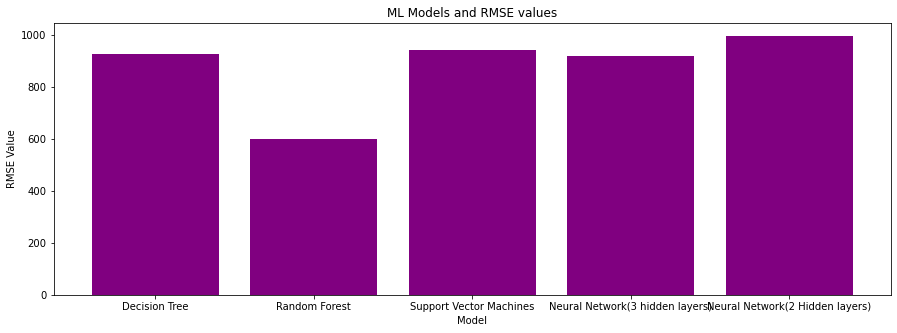

In [41]:
plt.figure(figsize=(15,5))
plt.bar(names, rmse_values, color = "purple")
plt.xlabel("Model")
plt.ylabel("RMSE Value")
plt.title("ML Models and RMSE values")
plt.show()

# We get lowest RMSE in Random Forest Regressor model.......
Hence it can be used for evaluation.....